
## Step 1: Split map tile to "superpixels"

This is explanation code for the first step of searching for specific tiles on map: splitting each tile to some similar regions, aka superpixels. The idea is to decrease dimension of images for next stages of algorithm, ie for the feature extractions.

So, these are fragments of code I've used to split big tile (say 1000x1000) to superpixels. After some experimentation, I've chose SLIC algorithm to complete this task (other candidates were standart skimage modules: felzenszwalb, quickshift, watershed). 

In [2]:
import matplotlib.pyplot as plt
import numpy as np


from skimage import io
from skimage.segmentation import slic # how to split an image
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from scipy import misc

from scipy import ndimage
from PIL import Image
from skimage.measure import regionprops


from os import listdir
from os.path import isfile, join


### Demonstration, how segmentation algorythm works. Example of superpixels with marked boundaries
Get image, split it to superpixels(~30 segments), mark boundaries with yellow color 


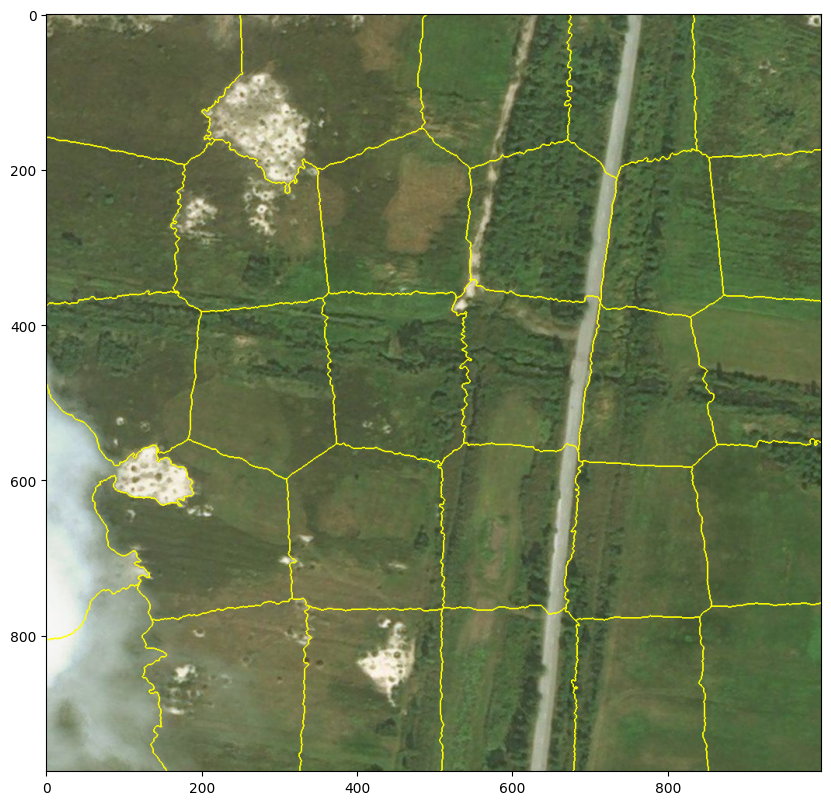

In [5]:
img_path = "./datasets/example/" # images to classify
name = "positive1.png"
full_name = join(img_path, name)

img = io.imread(full_name) # image as numpy array
original_image = Image.fromarray(img.astype('uint8'), 'RGB')  # same image as PIL object
img = img_as_float(img) # convert to float, to use for segmentation purposes

segments_slic = slic(img, n_segments=30, compactness=35, sigma=1) # segmentation to superpixels

marked_img = mark_boundaries(img, segments_slic)

plt.figure(figsize=(10,10))
plt.imshow(marked_img)




### Split to superpixels and save them on disk
Each segment/superpixel will be named as '{name}_super_{segment_label}.png', where "name" is name of the initial tile,
"segment_label" - label for this pixel (number from 1 to n_segments)

In [6]:


segments_info = regionprops(segments_slic) # get info about each segment(superpixel)
for segment in segments_info: # for each superpixel,
        min_row, min_col, max_row, max_col = segment.bbox  # bounding bog
        segment_label = segment.label  # labels are numbers, from 1 to n_segments (see prev cell)
        cropped = original_image.crop((min_col, min_row, max_col, max_row)) # crop image to this specific segment only
            
        tmp_name = "%s%s_super_%s.png" % (img_path, name[:-4], segment_label)
        cropped.save(tmp_name)

### How to compile the training data
One of the method: you could choose initial tiles with (and without) objects to search on map (ie amber mining places), split them to superpixels and manually create two sets of images - "positive" (with objects you are interested in), and "negative" - without such objects. 

In our case I've created simple annotation application (JS + Parse/MongoDB), to annotate initial image set in browser. Input data for this app was tiles with information about superpixels on each(see video).  Unfortunately, this application isn't ready for public use. Let me know if you are interested in obtaining this (very raw) code. 

Next, we need to extract features from each superpixel and train classifier. [See Step 2](step2.ipynb)